In [1]:
import numpy as np
import matplotlib.pyplot as plt
neon_phi = np.array([2590, 2564, 2500, 2484, 2458, 2436, 2430, 2390, 2380, 2362, 2352, 2338, 2316, 2294, 2286, 2266, 2256, 2238, 2216, 2192, 2158, 2146])
neon_lambda = np.array([7032, 6929, 6717, 6678, 6599, 6533, 6507, 6402, 6383, 6334, 6305, 6267, 6217, 6164, 6143, 6096, 6074, 6030, 5976, 5945, 5882, 5852])
hg_phi = np.array([2322, 2118, 2108, 1928, 1506, 842, 282])
hg_lambda = np.array([6234, 5791, 5770, 5461, 4916, 4358, 4047])

In [2]:
def print_fit(params, cov):
    names = ['a', 'b', 'c']
    names_cov = ['delta a', 'delta b', 'delta c']
    for i in range(len(params)):
        print('%s    %E    %s    %E' %(names[i], params[i], names_cov[i], cov[i]))

Градуировка по спектру неона. Приближение квадратичной функцией $f(x)=ax^2+bx+c$

a    1.912988E-03    delta a    7.431839E-05
b    -6.426484E+00    delta b    3.510981E-01
c    1.083577E+04    delta c    4.138558E+02


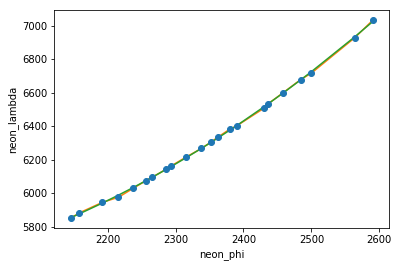

In [3]:
x = neon_phi
y = neon_lambda

def f(x, a, b, c):
    return a*x**2+b*x+c

from scipy.optimize import curve_fit
popt, pcov = curve_fit(f, x, y)
pcov = list(map(lambda x: np.sqrt(x), np.diag(pcov)))
fit = np.polyfit(x, y, 2, cov=True)
params = fit[0]
cov = list(map(lambda x: np.sqrt(x), np.diag(fit[1])))
params = np.array(popt)
cov = np.array(pcov)
print_fit(params, cov)
plt.errorbar(x, y, xerr=2, fmt='o')
plt.xlabel('neon_phi')
plt.ylabel('neon_lambda')
plt.plot(x, y)
plt.plot(x, params[0]*x**2+params[1]*x+params[2])
plt.show()

Градуировка по спектру ртути. Приближение квадратичной функцией $f(x)=ax^2+bx+c$

In [4]:
hg_phi = np.array([2322, 2118, 2108, 1928, 1506, 842, 282])
hg_lambda = np.array([6234, 5791, 5770, 5461, 4916, 4358, 4047])

a    4.174058E-04    delta a    5.069248E-05
b    -5.535710E-02    delta b    1.355391E-01
c    4.055233E+03    delta c    7.350135E+01


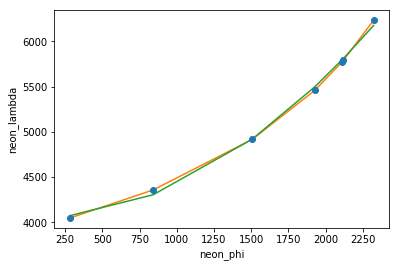

In [5]:
x = hg_phi
y = hg_lambda

def f(x, a, b, c):
    return a*x**2+b*x+c

from scipy.optimize import curve_fit
popt, pcov = curve_fit(f, x, y)
pcov = list(map(lambda x: np.sqrt(x), np.diag(pcov)))
fit2 = np.polyfit(x, y, 2, cov=True)
params2 = fit2[0]
cov2 = list(map(lambda x: np.sqrt(x), np.diag(fit2[1])))
params2 = np.array(popt)
cov2 = np.array(pcov)
print_fit(params2, cov2)
plt.errorbar(x, y, xerr=2, fmt='o')
plt.xlabel('neon_phi')
plt.ylabel('neon_lambda')
plt.plot(x, y)
plt.plot(x, params2[0]*x**2+params2[1]*x+params2[2])
plt.show()

In [6]:
def get_lambda(params, cov, x, cov_x):
    if x > 2200:
        my_lambda = params[0]*x**2+params[1]*x+params[2]
        cov_lambda = (cov[0]/params[0]+2*cov_x/x)*params[0]*x**2 + (cov[1]/params[1]+cov_x/x)*params[1]*x+cov[2]
    else:
        my_lambda = params2[0]*x**2+params2[1]*x+params2[2]
        cov_lambda = (cov2[0]/params2[0]+2*cov_x/x)*params2[0]*x**2 + (cov2[1]/params2[1]+cov_x/x)*params2[1]*x+cov2[2]
    return my_lambda, cov_lambda

По градуировке барабана определим значения $\lambda$, соответствующие линиям водорода. Для длин волн $\lambda < 2250$ будем использовать градуировку по неону, для $\lambda > 2250$ - по ртути.

In [7]:
H = ['H_alpha', 'H_beta', 'H_gamma']
lambdas = []
deg = [2442, 1448, 808]
for i in range(len(deg)):
    my_lambda, cov_lambda = get_lambda(params2, cov2, deg[i], 2)
    lambdas.append([my_lambda, cov_lambda])
    print('%s    %E A    %s    %E A    %s' %('lambda', my_lambda, 'delta_lambda', cov_lambda, H[i]))

lambda    6.409193E+03 A    delta_lambda    7.107520E+02 A    H_alpha
lambda    4.850252E+03 A    delta_lambda    3.783560E+02 A    H_beta
lambda    4.283013E+03 A    delta_lambda    2.173506E+02 A    H_gamma
